In [1]:
from sklearn.utils.class_weight import compute_class_weight
from transformers import AdamW
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from IPython.core.interactiveshell import InteractiveShell
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast
import time

# specify GPU
device = torch.device("cuda")

# This is for multiple print statements per cell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
df = pd.read_csv("pre-cleaned_consolidated_tweet_data.csv", sep='\t')
df.head()


,sentiment,text
0,negative,oh no its fading away again
1,positive,bunnylake will kill me but i cant stop listeni...
2,negative,last day in cali partyin for the last time wi...
3,negative,is having a major soar throat
4,positive,my last day as 12 years old


In [3]:
df['label'] = df.apply(lambda x: 1 if x['sentiment'] == 'positive' else 0,axis=1)
df.head()


,sentiment,text,label
0,negative,oh no its fading away again,0
1,positive,bunnylake will kill me but i cant stop listeni...,1
2,negative,last day in cali partyin for the last time wi...,0
3,negative,is having a major soar throat,0
4,positive,my last day as 12 years old,1


In [4]:
df = df[['label', 'text']]
df.head()



,label,text
0,0,oh no its fading away again
1,1,bunnylake will kill me but i cant stop listeni...
2,0,last day in cali partyin for the last time wi...
3,0,is having a major soar throat
4,1,my last day as 12 years old


In [5]:
from sklearn.utils.class_weight import compute_class_weight
from transformers import AdamW
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from IPython.core.interactiveshell import InteractiveShell
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast
import time

# specify GPU
device = torch.device("cuda")

# This is for multiple print statements per cell
InteractiveShell.ast_node_interactivity = "all"


In [6]:
df = pd.read_csv("spamdata_v2.txt")
df.head()


,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
from sklearn.utils.class_weight import compute_class_weight
from transformers import AdamW
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from IPython.core.interactiveshell import InteractiveShell
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast
import time

# specify GPU
device = torch.device("cuda")

# This is for multiple print statements per cell
InteractiveShell.ast_node_interactivity = "all"


In [8]:
df = pd.read_csv("spamdata_v2.txt")
df.head()


,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
train_text, temp_text, train_labels, temp_labels = \
    train_test_split(df['text'], df['label'], random_state=2018,
                     test_size=0.3, stratify=df['label'])


val_text, test_text, val_labels, test_labels = \
    train_test_split(temp_text, temp_labels, random_state=2018,
                     test_size=0.5, stratify=temp_labels)



In [10]:
bert = AutoModel.from_pretrained('bert-base-uncased')


In [11]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')


In [12]:
text = ["this is a bert model tutorial", "we will fine-tune a bert model"]


In [13]:
sent_id = tokenizer.batch_encode_plus(
    text, padding=True, return_token_type_ids=False)


In [14]:
print(sent_id)


{'input_ids': [[101, 2023, 2003, 1037, 14324, 2944, 14924, 4818, 102, 0], [101, 2057, 2097, 2986, 1011, 8694, 1037, 14324, 2944, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


<AxesSubplot:>

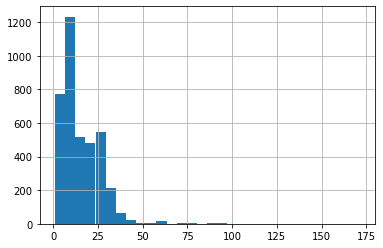

In [15]:
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins=30)


In [16]:
from sklearn.utils.class_weight import compute_class_weight
from transformers import AdamW
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from IPython.core.interactiveshell import InteractiveShell
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast
import time

# specify GPU
device = torch.device("cuda")

# This is for multiple print statements per cell
InteractiveShell.ast_node_interactivity = "all"


In [17]:
df = pd.read_csv("pre-cleaned_consolidated_tweet_data.csv", sep='\t')
df.head()


,sentiment,text
0,negative,oh no its fading away again
1,positive,bunnylake will kill me but i cant stop listeni...
2,negative,last day in cali partyin for the last time wi...
3,negative,is having a major soar throat
4,positive,my last day as 12 years old


In [18]:
df['label'] = df.apply(lambda x: 1 if x['sentiment']
                       == 'positive' else 0, axis=1)
df.head()


,sentiment,text,label
0,negative,oh no its fading away again,0
1,positive,bunnylake will kill me but i cant stop listeni...,1
2,negative,last day in cali partyin for the last time wi...,0
3,negative,is having a major soar throat,0
4,positive,my last day as 12 years old,1


In [19]:
df = df[['label', 'text']]
df.head()



,label,text
0,0,oh no its fading away again
1,1,bunnylake will kill me but i cant stop listeni...
2,0,last day in cali partyin for the last time wi...
3,0,is having a major soar throat
4,1,my last day as 12 years old


In [20]:
train_text, temp_text, train_labels, temp_labels = \
    train_test_split(df['text'], df['label'], random_state=2018,
                     test_size=0.3, stratify=df['label'])


val_text, test_text, val_labels, test_labels = \
    train_test_split(temp_text, temp_labels, random_state=2018,
                     test_size=0.5, stratify=temp_labels)



In [21]:
bert = AutoModel.from_pretrained('bert-base-uncased')


In [22]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')


In [23]:
text = ["this is a bert model tutorial", "we will fine-tune a bert model"]


In [24]:
sent_id = tokenizer.batch_encode_plus(
    text, padding=True, return_token_type_ids=False)


In [25]:
print(sent_id)


{'input_ids': [[101, 2023, 2003, 1037, 14324, 2944, 14924, 4818, 102, 0], [101, 2057, 2097, 2986, 1011, 8694, 1037, 14324, 2944, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


<AxesSubplot:>

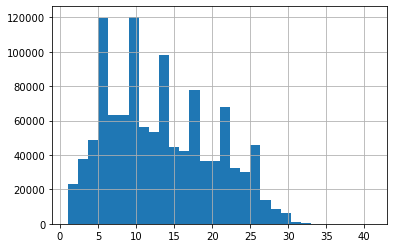

In [26]:
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins=30)


In [27]:
from sklearn.utils.class_weight import compute_class_weight
from transformers import AdamW
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from IPython.core.interactiveshell import InteractiveShell
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast
import time

# specify GPU
device = torch.device("cuda")

# This is for multiple print statements per cell
InteractiveShell.ast_node_interactivity = "all"


In [28]:
df = pd.read_csv("pre-cleaned_consolidated_tweet_data.csv", sep='\t')
df.head()


,sentiment,text
0,negative,oh no its fading away again
1,positive,bunnylake will kill me but i cant stop listeni...
2,negative,last day in cali partyin for the last time wi...
3,negative,is having a major soar throat
4,positive,my last day as 12 years old


In [29]:
frac = 0.2
# sample and shuffle the dataset according to the fraction choise in the line above
df = df.sample(frac=frac).reset_index(drop=True)



In [30]:
df['label'] = df.apply(lambda x: 1 if x['sentiment']
                       == 'positive' else 0, axis=1)
df.head()


,sentiment,text,label
0,positive,suggesting potential conference keynote speake...,1
1,negative,jeffarchuleta glad the new members are meshing...,0
2,negative,nicramirez my wisdom tooth is growing in,0
3,negative,i miss mcfly,0
4,positive,kirstyhawkshaw love the new song,1


In [31]:
df = df[['label', 'text']]
df.head()



,label,text
0,1,suggesting potential conference keynote speake...
1,0,jeffarchuleta glad the new members are meshing...
2,0,nicramirez my wisdom tooth is growing in
3,0,i miss mcfly
4,1,kirstyhawkshaw love the new song


In [32]:
train_text, temp_text, train_labels, temp_labels = \
    train_test_split(df['text'], df['label'], random_state=2018,
                     test_size=0.3, stratify=df['label'])


val_text, test_text, val_labels, test_labels = \
    train_test_split(temp_text, temp_labels, random_state=2018,
                     test_size=0.5, stratify=temp_labels)



In [33]:
bert = AutoModel.from_pretrained('bert-base-uncased')


In [34]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')


In [35]:
text = ["this is a bert model tutorial", "we will fine-tune a bert model"]


In [36]:
sent_id = tokenizer.batch_encode_plus(
    text, padding=True, return_token_type_ids=False)


In [37]:
print(sent_id)


{'input_ids': [[101, 2023, 2003, 1037, 14324, 2944, 14924, 4818, 102, 0], [101, 2057, 2097, 2986, 1011, 8694, 1037, 14324, 2944, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


<AxesSubplot:>

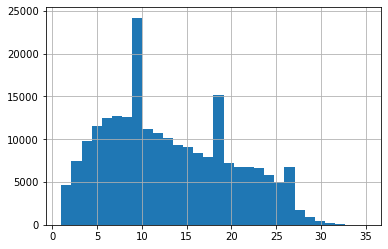

In [38]:
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins=30)


In [39]:
max_seq_len = 30


In [40]:
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length=max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)


In [41]:
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length=max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)


In [42]:
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length=max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)


In [43]:

# for train set
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

# for validation set
val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

# for test set
test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())


In [44]:

# define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(
    train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(
    val_data, sampler=val_sampler, batch_size=batch_size)


In [45]:

# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False


In [46]:


class BERT_Arch(nn.Module):

    def __init__(self, bert):
        super(BERT_Arch, self).__init__()
        self.bert = bert
        # dropout layer
        self.dropout = nn.Dropout(0.1)
        # relu activation function
        self.relu = nn.ReLU()
        # dense layer 1
        self.fc1 = nn.Linear(768, 512)
        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(512, 2)
        # softmax activation function
        self.softmax = nn.LogSoftmax(dim=1)

    # define the forward pass
    def forward(self, sent_id, mask):
        # pass the inputs to the model
        _, cls_hs = self.bert(sent_id, attention_mask=mask)
        x = self.fc1(cls_hs)
        x = self.relu(x)
        x = self.dropout(x)
        # output layer
        x = self.fc2(x)
        # apply softmax activation
        x = self.softmax(x)
        return x



In [47]:
model = BERT_Arch(bert)


In [48]:
model = model.to(device)

# optimizer from hugging face transformers

# define the optimizer
optimizer = AdamW(model.parameters(), lr=1e-3)


In [49]:


# compute the class weights
class_wts = compute_class_weight(
    'balanced', np.unique(train_labels), train_labels)

print(class_wts)

# convert class weights to tensor
weights = torch.tensor(class_wts, dtype=torch.float)
weights = weights.to(device)

# loss function
cross_entropy = nn.NLLLoss(weight=weights)

# number of training epochs
epochs = 10


[0.99531053 1.00473387]


In [50]:

# function to train the model


def train():
    model.train()
    total_loss, total_accuracy = 0, 0
    # empty list to save model predictions
    total_preds = []
    # iterate over batches
    for step, batch in enumerate(train_dataloader):
        # progress update after every 50 batches.
        if step % 50 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(
                step, len(train_dataloader)))
        # push the batch to gpu
        batch = [r.to(device) for r in batch]
        sent_id, mask, labels = batch
        # clear previously calculated gradients
        model.zero_grad()
        # get model predictions for the current batch
        preds = model(sent_id, mask)
        # compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)
        # add on to the total loss
        total_loss = total_loss + loss.item()
        # backward pass to calculate the gradients
        loss.backward()
        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        # update parameters
        optimizer.step()
        # model predictions are stored on GPU. So, push it to CPU
        preds = preds.detach().cpu().numpy()
        # append the model predictions
        total_preds.append(preds)

    # compute the training loss of the epoch
    avg_loss = total_loss / len(train_dataloader)
    # predictions are in the form of (no. of batches, size of batch, no. of classes).
    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds = np.concatenate(total_preds, axis=0)
    # returns the loss and predictions
    return avg_loss, total_preds


# function for evaluating the model
def evaluate():

    print("\nEvaluating...")

    # deactivate dropout layers
    model.eval()

    total_loss, total_accuracy = 0, 0

    # empty list to save the model predictions
    total_preds = []

    # iterate over batches
    for step, batch in enumerate(val_dataloader):

        # Progress update every 50 batches.
        if step % 50 == 0 and not step == 0:

            # Calculate elapsed time in minutes.
            # elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.'.format(
                step, len(val_dataloader)))

        # push the batch to gpu
        batch = [t.to(device) for t in batch]

        sent_id, mask, labels = batch

        # deactivate autograd
        with torch.no_grad():

            # model predictions
            preds = model(sent_id, mask)

            # compute the validation loss between actual and predicted values
            loss = cross_entropy(preds, labels)

            total_loss = total_loss + loss.item()

            preds = preds.detach().cpu().numpy()

            total_preds.append(preds)

    # compute the validation loss of the epoch
    avg_loss = total_loss / len(val_dataloader)

    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds = np.concatenate(total_preds, axis=0)

    return avg_loss, total_preds



In [51]:

# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses = []
valid_losses = []

# for each epoch
for epoch in range(epochs):

    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))

    # train model
    train_loss, _ = train()

    # evaluate model
    valid_loss, _ = evaluate()

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')

    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')



 Epoch 1 / 10
  Batch    50  of  7,051.


KeyboardInterrupt: 

In [52]:
from sklearn.utils.class_weight import compute_class_weight
from transformers import AdamW
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from IPython.core.interactiveshell import InteractiveShell
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast
import time

# specify GPU
device = torch.device("cuda")

# This is for multiple print statements per cell
InteractiveShell.ast_node_interactivity = "all"


In [53]:
df = pd.read_csv("pre-cleaned_consolidated_tweet_data.csv", sep='\t')
df.head()


,sentiment,text
0,negative,oh no its fading away again
1,positive,bunnylake will kill me but i cant stop listeni...
2,negative,last day in cali partyin for the last time wi...
3,negative,is having a major soar throat
4,positive,my last day as 12 years old


In [54]:
frac = 0.2
# sample and shuffle the dataset according to the fraction choise in the line above
df = df.sample(frac=frac).reset_index(drop=True)



In [55]:
df['label'] = df.apply(lambda x: 1 if x['sentiment']
                       == 'positive' else 0, axis=1)
df.head()


,sentiment,text,label
0,negative,only one baby bunny left,0
1,negative,typicaldoll miss u so much girl and love u so...,0
2,negative,adamcolas adammmmmmm whats uppppp we dont talk...,0
3,positive,gnarrly yeah infinite exam period with no exam...,1
4,positive,juniperus aww those kids im good sipping my i...,1


In [56]:
df = df[['label', 'text']]
df.head()



,label,text
0,0,only one baby bunny left
1,0,typicaldoll miss u so much girl and love u so...
2,0,adamcolas adammmmmmm whats uppppp we dont talk...
3,1,gnarrly yeah infinite exam period with no exam...
4,1,juniperus aww those kids im good sipping my i...


In [57]:
train_text, temp_text, train_labels, temp_labels = \
    train_test_split(df['text'], df['label'], random_state=2018,
                     test_size=0.3, stratify=df['label'])


val_text, test_text, val_labels, test_labels = \
    train_test_split(temp_text, temp_labels, random_state=2018,
                     test_size=0.5, stratify=temp_labels)



In [58]:
bert = AutoModel.from_pretrained('bert-base-uncased')


In [59]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')


In [60]:
text = ["this is a bert model tutorial", "we will fine-tune a bert model"]


In [61]:
sent_id = tokenizer.batch_encode_plus(
    text, padding=True, return_token_type_ids=False)


In [62]:
print(sent_id)


{'input_ids': [[101, 2023, 2003, 1037, 14324, 2944, 14924, 4818, 102, 0], [101, 2057, 2097, 2986, 1011, 8694, 1037, 14324, 2944, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


<AxesSubplot:>

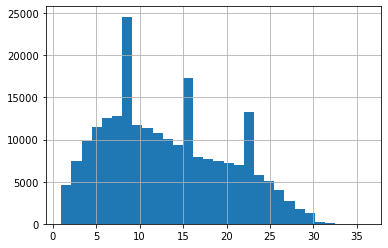

In [63]:
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins=30)


In [64]:
max_seq_len = 30


In [65]:
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length=max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)


In [66]:
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length=max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)


In [67]:
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length=max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)


In [68]:

# for train set
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

# for validation set
val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

# for test set
test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())


In [69]:

# define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(
    train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(
    val_data, sampler=val_sampler, batch_size=batch_size)


In [70]:

# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False


In [71]:


class BERT_Arch(nn.Module):

    def __init__(self, bert):
        super(BERT_Arch, self).__init__()
        self.bert = bert
        # dropout layer
        self.dropout = nn.Dropout(0.1)
        # relu activation function
        self.relu = nn.ReLU()
        # dense layer 1
        self.fc1 = nn.Linear(768, 512)
        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(512, 2)
        # softmax activation function
        self.softmax = nn.LogSoftmax(dim=1)

    # define the forward pass
    def forward(self, sent_id, mask):
        # pass the inputs to the model
        _, cls_hs = self.bert(sent_id, attention_mask=mask)
        x = self.fc1(cls_hs)
        x = self.relu(x)
        x = self.dropout(x)
        # output layer
        x = self.fc2(x)
        # apply softmax activation
        x = self.softmax(x)
        return x



In [72]:
model = BERT_Arch(bert)


In [73]:
model = model.to(device)

# optimizer from hugging face transformers

# define the optimizer
optimizer = AdamW(model.parameters(), lr=1e-3)


In [74]:


# compute the class weights
class_wts = compute_class_weight(
    'balanced', np.unique(train_labels), train_labels)

print(class_wts)

# convert class weights to tensor
weights = torch.tensor(class_wts, dtype=torch.float)
weights = weights.to(device)

# loss function
cross_entropy = nn.NLLLoss(weight=weights)

# number of training epochs
epochs = 10


[0.99313742 1.00695808]


In [75]:

# function to train the model


def train():
    model.train()
    total_loss, total_accuracy = 0, 0
    # empty list to save model predictions
    total_preds = []
    # iterate over batches
    for step, batch in enumerate(train_dataloader):
        # progress update after every 50 batches.
        if step % 50 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(
                step, len(train_dataloader)))
        # push the batch to gpu
        batch = [r.to(device) for r in batch]
        sent_id, mask, labels = batch
        # clear previously calculated gradients
        model.zero_grad()
        # get model predictions for the current batch
        preds = model(sent_id, mask)
        # compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)
        # add on to the total loss
        total_loss = total_loss + loss.item()
        # backward pass to calculate the gradients
        loss.backward()
        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        # update parameters
        optimizer.step()
        # model predictions are stored on GPU. So, push it to CPU
        preds = preds.detach().cpu().numpy()
        # append the model predictions
        total_preds.append(preds)

    # compute the training loss of the epoch
    avg_loss = total_loss / len(train_dataloader)
    # predictions are in the form of (no. of batches, size of batch, no. of classes).
    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds = np.concatenate(total_preds, axis=0)
    # returns the loss and predictions
    return avg_loss, total_preds


# function for evaluating the model
def evaluate():

    print("\nEvaluating...")

    # deactivate dropout layers
    model.eval()

    total_loss, total_accuracy = 0, 0

    # empty list to save the model predictions
    total_preds = []

    # iterate over batches
    for step, batch in enumerate(val_dataloader):

        # Progress update every 50 batches.
        if step % 50 == 0 and not step == 0:

            # Calculate elapsed time in minutes.
            # elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.'.format(
                step, len(val_dataloader)))

        # push the batch to gpu
        batch = [t.to(device) for t in batch]

        sent_id, mask, labels = batch

        # deactivate autograd
        with torch.no_grad():

            # model predictions
            preds = model(sent_id, mask)

            # compute the validation loss between actual and predicted values
            loss = cross_entropy(preds, labels)

            total_loss = total_loss + loss.item()

            preds = preds.detach().cpu().numpy()

            total_preds.append(preds)

    # compute the validation loss of the epoch
    avg_loss = total_loss / len(val_dataloader)

    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds = np.concatenate(total_preds, axis=0)

    return avg_loss, total_preds



In [76]:

# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses = []
valid_losses = []

# for each epoch
for epoch in range(epochs):

    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))

    # train model
    train_loss, _ = train()

    # evaluate model
    valid_loss, _ = evaluate()

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')

    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')



 Epoch 1 / 10
  Batch    50  of  7,051.
  Batch   100  of  7,051.
  Batch   150  of  7,051.
  Batch   200  of  7,051.
  Batch   250  of  7,051.
  Batch   300  of  7,051.
  Batch   350  of  7,051.
  Batch   400  of  7,051.
  Batch   450  of  7,051.
  Batch   500  of  7,051.
  Batch   550  of  7,051.
  Batch   600  of  7,051.
  Batch   650  of  7,051.
  Batch   700  of  7,051.
  Batch   750  of  7,051.
  Batch   800  of  7,051.
  Batch   850  of  7,051.
  Batch   900  of  7,051.
  Batch   950  of  7,051.
  Batch 1,000  of  7,051.
  Batch 1,050  of  7,051.
  Batch 1,100  of  7,051.
  Batch 1,150  of  7,051.
  Batch 1,200  of  7,051.
  Batch 1,250  of  7,051.
  Batch 1,300  of  7,051.
  Batch 1,350  of  7,051.
  Batch 1,400  of  7,051.
  Batch 1,450  of  7,051.
  Batch 1,500  of  7,051.
  Batch 1,550  of  7,051.
  Batch 1,600  of  7,051.
  Batch 1,650  of  7,051.
  Batch 1,700  of  7,051.
  Batch 1,750  of  7,051.
  Batch 1,800  of  7,051.
  Batch 1,850  of  7,051.
  Batch 1,900  of  7,05

KeyboardInterrupt: 

In [77]:
from sklearn.utils.class_weight import compute_class_weight
from transformers import AdamW
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from IPython.core.interactiveshell import InteractiveShell
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast
import time

# specify GPU
device = torch.device("cuda")

# This is for multiple print statements per cell
InteractiveShell.ast_node_interactivity = "all"


In [78]:
df = pd.read_csv("pre-cleaned_consolidated_tweet_data.csv", sep='\t')
df.head()


,sentiment,text
0,negative,oh no its fading away again
1,positive,bunnylake will kill me but i cant stop listeni...
2,negative,last day in cali partyin for the last time wi...
3,negative,is having a major soar throat
4,positive,my last day as 12 years old


In [79]:
frac = 0.02
# sample and shuffle the dataset according to the fraction choise in the line above
df = df.sample(frac=frac).reset_index(drop=True)



In [80]:
df['label'] = df.apply(lambda x: 1 if x['sentiment']
                       == 'positive' else 0, axis=1)
df.head()


,sentiment,text,label
0,negative,bernadinee can u take the photo of box collect...,0
1,positive,killing electronica,1
2,positive,off to sorrento in 4 weeks tanning eating dri...,1
3,negative,nikkibenz you mean you couldnt get out of the ...,0
4,positive,donniescupcake you still have a week girl take...,1


In [81]:
df = df[['label', 'text']]
df.head()



,label,text
0,0,bernadinee can u take the photo of box collect...
1,1,killing electronica
2,1,off to sorrento in 4 weeks tanning eating dri...
3,0,nikkibenz you mean you couldnt get out of the ...
4,1,donniescupcake you still have a week girl take...


In [82]:
train_text, temp_text, train_labels, temp_labels = \
    train_test_split(df['text'], df['label'], random_state=2018,
                     test_size=0.3, stratify=df['label'])


val_text, test_text, val_labels, test_labels = \
    train_test_split(temp_text, temp_labels, random_state=2018,
                     test_size=0.5, stratify=temp_labels)



In [83]:
bert = AutoModel.from_pretrained('bert-base-uncased')


In [84]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')


In [85]:
text = ["this is a bert model tutorial", "we will fine-tune a bert model"]


In [86]:
sent_id = tokenizer.batch_encode_plus(
    text, padding=True, return_token_type_ids=False)


In [87]:
print(sent_id)


{'input_ids': [[101, 2023, 2003, 1037, 14324, 2944, 14924, 4818, 102, 0], [101, 2057, 2097, 2986, 1011, 8694, 1037, 14324, 2944, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


<AxesSubplot:>

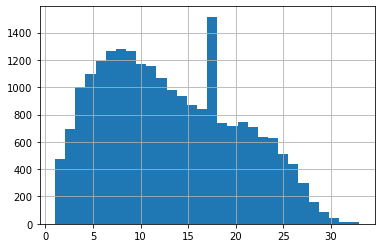

In [88]:
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins=30)


In [89]:
max_seq_len = 30


In [90]:
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length=max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)


In [91]:
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length=max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)


In [92]:
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length=max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)


In [93]:

# for train set
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

# for validation set
val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

# for test set
test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())


In [94]:

# define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(
    train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(
    val_data, sampler=val_sampler, batch_size=batch_size)


In [95]:

# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False


In [96]:


class BERT_Arch(nn.Module):

    def __init__(self, bert):
        super(BERT_Arch, self).__init__()
        self.bert = bert
        # dropout layer
        self.dropout = nn.Dropout(0.1)
        # relu activation function
        self.relu = nn.ReLU()
        # dense layer 1
        self.fc1 = nn.Linear(768, 512)
        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(512, 2)
        # softmax activation function
        self.softmax = nn.LogSoftmax(dim=1)

    # define the forward pass
    def forward(self, sent_id, mask):
        # pass the inputs to the model
        _, cls_hs = self.bert(sent_id, attention_mask=mask)
        x = self.fc1(cls_hs)
        x = self.relu(x)
        x = self.dropout(x)
        # output layer
        x = self.fc2(x)
        # apply softmax activation
        x = self.softmax(x)
        return x



In [97]:
model = BERT_Arch(bert)


In [98]:
model = model.to(device)

# optimizer from hugging face transformers

# define the optimizer
optimizer = AdamW(model.parameters(), lr=1e-3)


In [99]:


# compute the class weights
class_wts = compute_class_weight(
    'balanced', np.unique(train_labels), train_labels)

print(class_wts)

# convert class weights to tensor
weights = torch.tensor(class_wts, dtype=torch.float)
weights = weights.to(device)

# loss function
cross_entropy = nn.NLLLoss(weight=weights)

# number of training epochs
epochs = 10


[0.98536862 1.01507244]


In [100]:

# function to train the model


def train():
    model.train()
    total_loss, total_accuracy = 0, 0
    # empty list to save model predictions
    total_preds = []
    # iterate over batches
    for step, batch in enumerate(train_dataloader):
        # progress update after every 50 batches.
        if step % 50 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(
                step, len(train_dataloader)))
        # push the batch to gpu
        batch = [r.to(device) for r in batch]
        sent_id, mask, labels = batch
        # clear previously calculated gradients
        model.zero_grad()
        # get model predictions for the current batch
        preds = model(sent_id, mask)
        # compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)
        # add on to the total loss
        total_loss = total_loss + loss.item()
        # backward pass to calculate the gradients
        loss.backward()
        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        # update parameters
        optimizer.step()
        # model predictions are stored on GPU. So, push it to CPU
        preds = preds.detach().cpu().numpy()
        # append the model predictions
        total_preds.append(preds)

    # compute the training loss of the epoch
    avg_loss = total_loss / len(train_dataloader)
    # predictions are in the form of (no. of batches, size of batch, no. of classes).
    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds = np.concatenate(total_preds, axis=0)
    # returns the loss and predictions
    return avg_loss, total_preds


# function for evaluating the model
def evaluate():

    print("\nEvaluating...")

    # deactivate dropout layers
    model.eval()

    total_loss, total_accuracy = 0, 0

    # empty list to save the model predictions
    total_preds = []

    # iterate over batches
    for step, batch in enumerate(val_dataloader):

        # Progress update every 50 batches.
        if step % 50 == 0 and not step == 0:

            # Calculate elapsed time in minutes.
            # elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.'.format(
                step, len(val_dataloader)))

        # push the batch to gpu
        batch = [t.to(device) for t in batch]

        sent_id, mask, labels = batch

        # deactivate autograd
        with torch.no_grad():

            # model predictions
            preds = model(sent_id, mask)

            # compute the validation loss between actual and predicted values
            loss = cross_entropy(preds, labels)

            total_loss = total_loss + loss.item()

            preds = preds.detach().cpu().numpy()

            total_preds.append(preds)

    # compute the validation loss of the epoch
    avg_loss = total_loss / len(val_dataloader)

    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds = np.concatenate(total_preds, axis=0)

    return avg_loss, total_preds



In [101]:

# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses = []
valid_losses = []

# for each epoch
for epoch in range(epochs):

    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))

    # train model
    train_loss, _ = train()

    # evaluate model
    valid_loss, _ = evaluate()

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')

    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')



 Epoch 1 / 10
  Batch    50  of    706.
  Batch   100  of    706.
  Batch   150  of    706.
  Batch   200  of    706.
  Batch   250  of    706.
  Batch   300  of    706.
  Batch   350  of    706.
  Batch   400  of    706.
  Batch   450  of    706.
  Batch   500  of    706.
  Batch   550  of    706.
  Batch   600  of    706.
  Batch   650  of    706.
  Batch   700  of    706.

Evaluating...
  Batch    50  of    152.
  Batch   100  of    152.
  Batch   150  of    152.

Training Loss: 0.650
Validation Loss: 0.567

 Epoch 2 / 10
  Batch    50  of    706.
  Batch   100  of    706.
  Batch   150  of    706.
  Batch   200  of    706.
  Batch   250  of    706.
  Batch   300  of    706.
  Batch   350  of    706.
  Batch   400  of    706.
  Batch   450  of    706.
  Batch   500  of    706.
  Batch   550  of    706.
  Batch   600  of    706.
  Batch   650  of    706.
  Batch   700  of    706.

Evaluating...
  Batch    50  of    152.
  Batch   100  of    152.
  Batch   150  of    152.

Training L

In [102]:

# load weights of best model
path = 'saved_weights-tweet_sentiment_classification.pt'
model.load_state_dict(torch.load(path))


FileNotFoundError: [Errno 2] No such file or directory: 'saved_weights-tweet_sentiment_classification.pt'

In [103]:

# load weights of best model
path = 'saved_weights-tweet_sentiment_classification-27102020.pt'
model.load_state_dict(torch.load(path))


FileNotFoundError: [Errno 2] No such file or directory: 'saved_weights-tweet_sentiment_classification-27102020.pt'

In [104]:

# load weights of best model
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))


FileNotFoundError: [Errno 2] No such file or directory: 'saved_weights.pt'

In [105]:
from sklearn.utils.class_weight import compute_class_weight
from transformers import AdamW
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from IPython.core.interactiveshell import InteractiveShell
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast
import time

# specify GPU
device = torch.device("cuda")

# This is for multiple print statements per cell
InteractiveShell.ast_node_interactivity = "all"


In [106]:
df = pd.read_csv("pre-cleaned_consolidated_tweet_data.csv", sep='\t')
df.head()


,sentiment,text
0,negative,oh no its fading away again
1,positive,bunnylake will kill me but i cant stop listeni...
2,negative,last day in cali partyin for the last time wi...
3,negative,is having a major soar throat
4,positive,my last day as 12 years old


In [107]:
frac = 0.002
# sample and shuffle the dataset according to the fraction choise in the line above
df = df.sample(frac=frac).reset_index(drop=True)



In [108]:
df['label'] = df.apply(lambda x: 1 if x['sentiment']
                       == 'positive' else 0, axis=1)
df.head()


,sentiment,text,label
0,positive,i just realized that i aspire to be a cross be...,1
1,negative,ohgoodnesspris you named it jonathan junior wo...,0
2,negative,really disappointed that shaheen jafargholi di...,0
3,positive,i cant believe i have my very own miniature ha...,1
4,negative,i love my niece i really do but i want her to ...,0


In [109]:
df = df[['label', 'text']]
df.head()



,label,text
0,1,i just realized that i aspire to be a cross be...
1,0,ohgoodnesspris you named it jonathan junior wo...
2,0,really disappointed that shaheen jafargholi di...
3,1,i cant believe i have my very own miniature ha...
4,0,i love my niece i really do but i want her to ...


In [110]:
train_text, temp_text, train_labels, temp_labels = \
    train_test_split(df['text'], df['label'], random_state=2018,
                     test_size=0.3, stratify=df['label'])


val_text, test_text, val_labels, test_labels = \
    train_test_split(temp_text, temp_labels, random_state=2018,
                     test_size=0.5, stratify=temp_labels)



In [111]:
bert = AutoModel.from_pretrained('bert-base-uncased')


In [112]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')


In [113]:
text = ["this is a bert model tutorial", "we will fine-tune a bert model"]


In [114]:
sent_id = tokenizer.batch_encode_plus(
    text, padding=True, return_token_type_ids=False)


In [115]:
print(sent_id)


{'input_ids': [[101, 2023, 2003, 1037, 14324, 2944, 14924, 4818, 102, 0], [101, 2057, 2097, 2986, 1011, 8694, 1037, 14324, 2944, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


<AxesSubplot:>

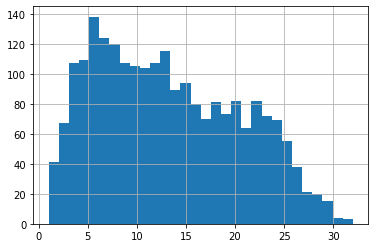

In [116]:
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins=30)


In [117]:
max_seq_len = 30


In [118]:
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length=max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)


In [119]:
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length=max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)


In [120]:
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length=max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)


In [121]:

# for train set
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

# for validation set
val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

# for test set
test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())


In [122]:

# define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(
    train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(
    val_data, sampler=val_sampler, batch_size=batch_size)


In [123]:

# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False


In [124]:


class BERT_Arch(nn.Module):

    def __init__(self, bert):
        super(BERT_Arch, self).__init__()
        self.bert = bert
        # dropout layer
        self.dropout = nn.Dropout(0.1)
        # relu activation function
        self.relu = nn.ReLU()
        # dense layer 1
        self.fc1 = nn.Linear(768, 512)
        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(512, 2)
        # softmax activation function
        self.softmax = nn.LogSoftmax(dim=1)

    # define the forward pass
    def forward(self, sent_id, mask):
        # pass the inputs to the model
        _, cls_hs = self.bert(sent_id, attention_mask=mask)
        x = self.fc1(cls_hs)
        x = self.relu(x)
        x = self.dropout(x)
        # output layer
        x = self.fc2(x)
        # apply softmax activation
        x = self.softmax(x)
        return x



In [125]:
model = BERT_Arch(bert)


In [126]:
model = model.to(device)

# optimizer from hugging face transformers

# define the optimizer
optimizer = AdamW(model.parameters(), lr=1e-3)


In [127]:


# compute the class weights
class_wts = compute_class_weight(
    'balanced', np.unique(train_labels), train_labels)

print(class_wts)

# convert class weights to tensor
weights = torch.tensor(class_wts, dtype=torch.float)
weights = weights.to(device)

# loss function
cross_entropy = nn.NLLLoss(weight=weights)

# number of training epochs
epochs = 10


[0.98086957 1.0198915 ]


In [128]:

# function to train the model


def train():
    model.train()
    total_loss, total_accuracy = 0, 0
    # empty list to save model predictions
    total_preds = []
    # iterate over batches
    for step, batch in enumerate(train_dataloader):
        # progress update after every 50 batches.
        if step % 50 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(
                step, len(train_dataloader)))
        # push the batch to gpu
        batch = [r.to(device) for r in batch]
        sent_id, mask, labels = batch
        # clear previously calculated gradients
        model.zero_grad()
        # get model predictions for the current batch
        preds = model(sent_id, mask)
        # compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)
        # add on to the total loss
        total_loss = total_loss + loss.item()
        # backward pass to calculate the gradients
        loss.backward()
        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        # update parameters
        optimizer.step()
        # model predictions are stored on GPU. So, push it to CPU
        preds = preds.detach().cpu().numpy()
        # append the model predictions
        total_preds.append(preds)

    # compute the training loss of the epoch
    avg_loss = total_loss / len(train_dataloader)
    # predictions are in the form of (no. of batches, size of batch, no. of classes).
    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds = np.concatenate(total_preds, axis=0)
    # returns the loss and predictions
    return avg_loss, total_preds


# function for evaluating the model
def evaluate():

    print("\nEvaluating...")

    # deactivate dropout layers
    model.eval()

    total_loss, total_accuracy = 0, 0

    # empty list to save the model predictions
    total_preds = []

    # iterate over batches
    for step, batch in enumerate(val_dataloader):

        # Progress update every 50 batches.
        if step % 50 == 0 and not step == 0:

            # Calculate elapsed time in minutes.
            # elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.'.format(
                step, len(val_dataloader)))

        # push the batch to gpu
        batch = [t.to(device) for t in batch]

        sent_id, mask, labels = batch

        # deactivate autograd
        with torch.no_grad():

            # model predictions
            preds = model(sent_id, mask)

            # compute the validation loss between actual and predicted values
            loss = cross_entropy(preds, labels)

            total_loss = total_loss + loss.item()

            preds = preds.detach().cpu().numpy()

            total_preds.append(preds)

    # compute the validation loss of the epoch
    avg_loss = total_loss / len(val_dataloader)

    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds = np.concatenate(total_preds, axis=0)

    return avg_loss, total_preds



In [129]:

# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses = []
valid_losses = []

# for each epoch
for epoch in range(epochs):

    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))

    # train model
    train_loss, _ = train()

    # evaluate model
    valid_loss, _ = evaluate()

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')

    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')



 Epoch 1 / 10
  Batch    50  of     71.

Evaluating...

Training Loss: 0.701
Validation Loss: 0.643

 Epoch 2 / 10
  Batch    50  of     71.

Evaluating...

Training Loss: 0.670
Validation Loss: 0.629

 Epoch 3 / 10
  Batch    50  of     71.

Evaluating...

Training Loss: 0.654
Validation Loss: 0.621

 Epoch 4 / 10
  Batch    50  of     71.

Evaluating...

Training Loss: 0.651
Validation Loss: 0.595

 Epoch 5 / 10
  Batch    50  of     71.

Evaluating...

Training Loss: 0.631
Validation Loss: 0.622

 Epoch 6 / 10
  Batch    50  of     71.

Evaluating...

Training Loss: 0.628
Validation Loss: 0.582

 Epoch 7 / 10
  Batch    50  of     71.

Evaluating...

Training Loss: 0.616
Validation Loss: 0.602

 Epoch 8 / 10
  Batch    50  of     71.

Evaluating...

Training Loss: 0.614
Validation Loss: 0.563

 Epoch 9 / 10
  Batch    50  of     71.

Evaluating...

Training Loss: 0.586
Validation Loss: 0.635

 Epoch 10 / 10
  Batch    50  of     71.

Evaluating...

Training Loss: 0.612
Validation L

In [130]:

# load weights of best model
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))


<All keys matched successfully>

In [131]:
# useful : https://pytorch.org/tutorials/recipes/recipes/save_load_across_devices.html
# Put model in evaluation mode
model.cpu()
model.eval()
# torch.cuda.empty_cache()
# get predictions for test data
with torch.no_grad():
    # test_seq, test_mask =
    # preds = model(test_seq.to(device), test_mask.to(device))
    preds = model(test_seq, test_mask)

    # preds = preds.detach().cpu().numpy()

# model's performance
preds = np.argmax(preds, axis=1)
print(classification_report(test_y, preds))

# confusion matrix
pd.crosstab(test_y, preds)


BERT_Arch(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
  

BERT_Arch(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
  

              precision    recall  f1-score   support

           0       0.81      0.51      0.63       247
           1       0.63      0.87      0.73       237

    accuracy                           0.69       484
   macro avg       0.72      0.69      0.68       484
weighted avg       0.72      0.69      0.68       484



col_0,0,1
row_0,,
0,126,121
1,30,207


In [132]:
from sklearn.utils.class_weight import compute_class_weight
from transformers import AdamW
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from IPython.core.interactiveshell import InteractiveShell
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast
import time

# specify GPU
device = torch.device("cuda")

# This is for multiple print statements per cell
InteractiveShell.ast_node_interactivity = "all"


In [133]:
df = pd.read_csv("pre-cleaned_consolidated_tweet_data.csv", sep='\t')
df.head()


,sentiment,text
0,negative,oh no its fading away again
1,positive,bunnylake will kill me but i cant stop listeni...
2,negative,last day in cali partyin for the last time wi...
3,negative,is having a major soar throat
4,positive,my last day as 12 years old


In [134]:
frac = 0.002
# sample and shuffle the dataset according to the fraction choise in the line above
df = df.sample(frac=frac).reset_index(drop=True)



In [135]:
df['label'] = df.apply(lambda x: 1 if x['sentiment']
                       == 'positive' else 0, axis=1)
df.head()


,sentiment,text,label
0,positive,sat at youthy club x,1
1,positive,minor mechanical failure thought id snapped b...,1
2,positive,lemlemishere im drinking mezcal i still have ...,1
3,negative,man im gonna miss cruz so much,0
4,positive,eating tic tacs on the train i think one just ...,1


In [136]:
df = df[['label', 'text']]
df.head()



,label,text
0,1,sat at youthy club x
1,1,minor mechanical failure thought id snapped b...
2,1,lemlemishere im drinking mezcal i still have ...
3,0,man im gonna miss cruz so much
4,1,eating tic tacs on the train i think one just ...


In [137]:
train_text, temp_text, train_labels, temp_labels = \
    train_test_split(df['text'], df['label'], random_state=2018,
                     test_size=0.3, stratify=df['label'])


val_text, test_text, val_labels, test_labels = \
    train_test_split(temp_text, temp_labels, random_state=2018,
                     test_size=0.5, stratify=temp_labels)



In [138]:
bert = AutoModel.from_pretrained('bert-base-uncased')


In [139]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')


In [140]:
text = ["this is a bert model tutorial", "we will fine-tune a bert model"]


In [141]:
sent_id = tokenizer.batch_encode_plus(
    text, padding=True, return_token_type_ids=False)


In [142]:
print(sent_id)


{'input_ids': [[101, 2023, 2003, 1037, 14324, 2944, 14924, 4818, 102, 0], [101, 2057, 2097, 2986, 1011, 8694, 1037, 14324, 2944, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


<AxesSubplot:>

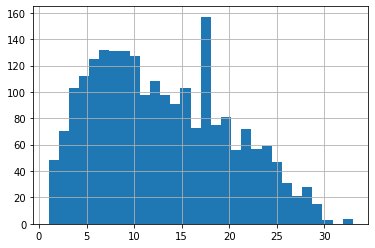

In [143]:
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins=30)


In [144]:
max_seq_len = 30


In [145]:
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length=max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)


In [146]:
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length=max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)


In [147]:
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length=max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)


In [148]:

# for train set
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

# for validation set
val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

# for test set
test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())


In [149]:

# define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(
    train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(
    val_data, sampler=val_sampler, batch_size=batch_size)


In [150]:

# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False


In [151]:


class BERT_Arch(nn.Module):

    def __init__(self, bert):
        super(BERT_Arch, self).__init__()
        self.bert = bert
        # dropout layer
        self.dropout = nn.Dropout(0.1)
        # relu activation function
        self.relu = nn.ReLU()
        # dense layer 1
        self.fc1 = nn.Linear(768, 512)
        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(512, 2)
        # softmax activation function
        self.softmax = nn.LogSoftmax(dim=1)

    # define the forward pass
    def forward(self, sent_id, mask):
        # pass the inputs to the model
        _, cls_hs = self.bert(sent_id, attention_mask=mask)
        x = self.fc1(cls_hs)
        x = self.relu(x)
        x = self.dropout(x)
        # output layer
        x = self.fc2(x)
        # apply softmax activation
        x = self.softmax(x)
        return x



In [152]:
model = BERT_Arch(bert)


In [153]:
model = model.to(device)

# optimizer from hugging face transformers

# define the optimizer
optimizer = AdamW(model.parameters(), lr=1e-3)


In [154]:


# compute the class weights
class_wts = compute_class_weight(
    'balanced', np.unique(train_labels), train_labels)

print(class_wts)

# convert class weights to tensor
weights = torch.tensor(class_wts, dtype=torch.float)
weights = weights.to(device)

# loss function
cross_entropy = nn.NLLLoss(weight=weights)

# number of training epochs
epochs = 20


[1.0080429  0.99208443]


In [155]:

# function to train the model


def train():
    model.train()
    total_loss, total_accuracy = 0, 0
    # empty list to save model predictions
    total_preds = []
    # iterate over batches
    for step, batch in enumerate(train_dataloader):
        # progress update after every 50 batches.
        if step % 50 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(
                step, len(train_dataloader)))
        # push the batch to gpu
        batch = [r.to(device) for r in batch]
        sent_id, mask, labels = batch
        # clear previously calculated gradients
        model.zero_grad()
        # get model predictions for the current batch
        preds = model(sent_id, mask)
        # compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)
        # add on to the total loss
        total_loss = total_loss + loss.item()
        # backward pass to calculate the gradients
        loss.backward()
        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        # update parameters
        optimizer.step()
        # model predictions are stored on GPU. So, push it to CPU
        preds = preds.detach().cpu().numpy()
        # append the model predictions
        total_preds.append(preds)

    # compute the training loss of the epoch
    avg_loss = total_loss / len(train_dataloader)
    # predictions are in the form of (no. of batches, size of batch, no. of classes).
    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds = np.concatenate(total_preds, axis=0)
    # returns the loss and predictions
    return avg_loss, total_preds


# function for evaluating the model
def evaluate():

    print("\nEvaluating...")

    # deactivate dropout layers
    model.eval()

    total_loss, total_accuracy = 0, 0

    # empty list to save the model predictions
    total_preds = []

    # iterate over batches
    for step, batch in enumerate(val_dataloader):

        # Progress update every 50 batches.
        if step % 50 == 0 and not step == 0:

            # Calculate elapsed time in minutes.
            # elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.'.format(
                step, len(val_dataloader)))

        # push the batch to gpu
        batch = [t.to(device) for t in batch]

        sent_id, mask, labels = batch

        # deactivate autograd
        with torch.no_grad():

            # model predictions
            preds = model(sent_id, mask)

            # compute the validation loss between actual and predicted values
            loss = cross_entropy(preds, labels)

            total_loss = total_loss + loss.item()

            preds = preds.detach().cpu().numpy()

            total_preds.append(preds)

    # compute the validation loss of the epoch
    avg_loss = total_loss / len(val_dataloader)

    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds = np.concatenate(total_preds, axis=0)

    return avg_loss, total_preds



In [156]:

# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses = []
valid_losses = []

# for each epoch
for epoch in range(epochs):

    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))

    # train model
    train_loss, _ = train()

    # evaluate model
    valid_loss, _ = evaluate()

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')

    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')



 Epoch 1 / 20
  Batch    50  of     71.

Evaluating...

Training Loss: 0.708
Validation Loss: 0.676

 Epoch 2 / 20
  Batch    50  of     71.

Evaluating...

Training Loss: 0.681
Validation Loss: 0.648

 Epoch 3 / 20
  Batch    50  of     71.

Evaluating...

Training Loss: 0.640
Validation Loss: 0.666

 Epoch 4 / 20
  Batch    50  of     71.

Evaluating...

Training Loss: 0.626
Validation Loss: 0.611

 Epoch 5 / 20
  Batch    50  of     71.

Evaluating...

Training Loss: 0.614
Validation Loss: 0.634

 Epoch 6 / 20
  Batch    50  of     71.

Evaluating...

Training Loss: 0.603
Validation Loss: 0.576

 Epoch 7 / 20
  Batch    50  of     71.

Evaluating...

Training Loss: 0.611
Validation Loss: 0.570

 Epoch 8 / 20
  Batch    50  of     71.

Evaluating...

Training Loss: 0.617
Validation Loss: 0.582

 Epoch 9 / 20
  Batch    50  of     71.

Evaluating...

Training Loss: 0.617
Validation Loss: 0.690

 Epoch 10 / 20
  Batch    50  of     71.

Evaluating...

Training Loss: 0.613
Validation L

In [157]:

# load weights of best model
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))


<All keys matched successfully>

In [158]:
# useful : https://pytorch.org/tutorials/recipes/recipes/save_load_across_devices.html
# Put model in evaluation mode
model.cpu()
# model.eval()
# torch.cuda.empty_cache()
# get predictions for test data
with torch.no_grad():
    # test_seq, test_mask =
    # preds = model(test_seq.to(device), test_mask.to(device))
    preds = model(test_seq, test_mask)

    # preds = preds.detach().cpu().numpy()

# model's performance
preds = np.argmax(preds, axis=1)
print(classification_report(test_y, preds))

# confusion matrix
pd.crosstab(test_y, preds)


BERT_Arch(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
  

              precision    recall  f1-score   support

           0       0.71      0.66      0.69       240
           1       0.69      0.73      0.71       244

    accuracy                           0.70       484
   macro avg       0.70      0.70      0.70       484
weighted avg       0.70      0.70      0.70       484



col_0,0,1
row_0,,
0,159,81
1,65,179


In [159]:
from sklearn.utils.class_weight import compute_class_weight
from transformers import AdamW
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from IPython.core.interactiveshell import InteractiveShell
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast
import time

# specify GPU
device = torch.device("cuda")

# This is for multiple print statements per cell
InteractiveShell.ast_node_interactivity = "all"


In [160]:
df = pd.read_csv("pre-cleaned_consolidated_tweet_data.csv", sep='\t')
df.head()


,sentiment,text
0,negative,oh no its fading away again
1,positive,bunnylake will kill me but i cant stop listeni...
2,negative,last day in cali partyin for the last time wi...
3,negative,is having a major soar throat
4,positive,my last day as 12 years old


In [161]:
frac = 0.01
# sample and shuffle the dataset according to the fraction choise in the line above
df = df.sample(frac=frac).reset_index(drop=True)



In [162]:
df['label'] = df.apply(lambda x: 1 if x['sentiment']
                       == 'positive' else 0, axis=1)
df.head()


,sentiment,text,label
0,positive,jeanlogan but is he a twitter expert i think not,1
1,negative,feet are killing off new shoes for sixth form,0
2,positive,on my way homme goooood show tonight lt3 haha...,1
3,positive,httptwitpiccom6rrh2 the family matt son adam...,1
4,positive,exams soon s oh well watchin old school goo...,1


In [163]:
df = df[['label', 'text']]
df.head()



,label,text
0,1,jeanlogan but is he a twitter expert i think not
1,0,feet are killing off new shoes for sixth form
2,1,on my way homme goooood show tonight lt3 haha...
3,1,httptwitpiccom6rrh2 the family matt son adam...
4,1,exams soon s oh well watchin old school goo...


In [164]:
train_text, temp_text, train_labels, temp_labels = \
    train_test_split(df['text'], df['label'], random_state=2018,
                     test_size=0.3, stratify=df['label'])


val_text, test_text, val_labels, test_labels = \
    train_test_split(temp_text, temp_labels, random_state=2018,
                     test_size=0.5, stratify=temp_labels)



In [165]:
bert = AutoModel.from_pretrained('bert-base-uncased')


In [166]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')


In [167]:
text = ["this is a bert model tutorial", "we will fine-tune a bert model"]


In [168]:
sent_id = tokenizer.batch_encode_plus(
    text, padding=True, return_token_type_ids=False)


In [169]:
print(sent_id)


{'input_ids': [[101, 2023, 2003, 1037, 14324, 2944, 14924, 4818, 102, 0], [101, 2057, 2097, 2986, 1011, 8694, 1037, 14324, 2944, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


<AxesSubplot:>

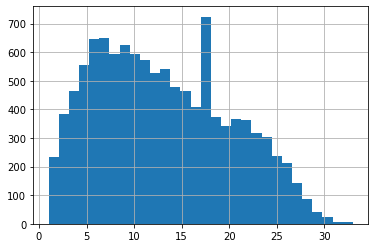

In [170]:
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins=30)


In [171]:
max_seq_len = 30


In [172]:
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length=max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)


In [173]:
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length=max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)


In [174]:
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length=max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)


In [175]:

# for train set
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

# for validation set
val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

# for test set
test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())


In [176]:

# define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(
    train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(
    val_data, sampler=val_sampler, batch_size=batch_size)


In [177]:

# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False


In [178]:


class BERT_Arch(nn.Module):

    def __init__(self, bert):
        super(BERT_Arch, self).__init__()
        self.bert = bert
        # dropout layer
        self.dropout = nn.Dropout(0.1)
        # relu activation function
        self.relu = nn.ReLU()
        # dense layer 1
        self.fc1 = nn.Linear(768, 512)
        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(512, 2)
        # softmax activation function
        self.softmax = nn.LogSoftmax(dim=1)

    # define the forward pass
    def forward(self, sent_id, mask):
        # pass the inputs to the model
        _, cls_hs = self.bert(sent_id, attention_mask=mask)
        x = self.fc1(cls_hs)
        x = self.relu(x)
        x = self.dropout(x)
        # output layer
        x = self.fc2(x)
        # apply softmax activation
        x = self.softmax(x)
        return x



In [179]:
model = BERT_Arch(bert)


In [180]:
model = model.to(device)

# optimizer from hugging face transformers

# define the optimizer
optimizer = AdamW(model.parameters(), lr=1e-3)


In [181]:


# compute the class weights
class_wts = compute_class_weight(
    'balanced', np.unique(train_labels), train_labels)

print(class_wts)

# convert class weights to tensor
weights = torch.tensor(class_wts, dtype=torch.float)
weights = weights.to(device)

# loss function
cross_entropy = nn.NLLLoss(weight=weights)

# number of training epochs
epochs = 20


[0.99734748 1.00266667]


In [182]:

# function to train the model


def train():
    model.train()
    total_loss, total_accuracy = 0, 0
    # empty list to save model predictions
    total_preds = []
    # iterate over batches
    for step, batch in enumerate(train_dataloader):
        # progress update after every 50 batches.
        if step % 50 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(
                step, len(train_dataloader)))
        # push the batch to gpu
        batch = [r.to(device) for r in batch]
        sent_id, mask, labels = batch
        # clear previously calculated gradients
        model.zero_grad()
        # get model predictions for the current batch
        preds = model(sent_id, mask)
        # compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)
        # add on to the total loss
        total_loss = total_loss + loss.item()
        # backward pass to calculate the gradients
        loss.backward()
        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        # update parameters
        optimizer.step()
        # model predictions are stored on GPU. So, push it to CPU
        preds = preds.detach().cpu().numpy()
        # append the model predictions
        total_preds.append(preds)

    # compute the training loss of the epoch
    avg_loss = total_loss / len(train_dataloader)
    # predictions are in the form of (no. of batches, size of batch, no. of classes).
    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds = np.concatenate(total_preds, axis=0)
    # returns the loss and predictions
    return avg_loss, total_preds


# function for evaluating the model
def evaluate():

    print("\nEvaluating...")

    # deactivate dropout layers
    model.eval()

    total_loss, total_accuracy = 0, 0

    # empty list to save the model predictions
    total_preds = []

    # iterate over batches
    for step, batch in enumerate(val_dataloader):

        # Progress update every 50 batches.
        if step % 50 == 0 and not step == 0:

            # Calculate elapsed time in minutes.
            # elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.'.format(
                step, len(val_dataloader)))

        # push the batch to gpu
        batch = [t.to(device) for t in batch]

        sent_id, mask, labels = batch

        # deactivate autograd
        with torch.no_grad():

            # model predictions
            preds = model(sent_id, mask)

            # compute the validation loss between actual and predicted values
            loss = cross_entropy(preds, labels)

            total_loss = total_loss + loss.item()

            preds = preds.detach().cpu().numpy()

            total_preds.append(preds)

    # compute the validation loss of the epoch
    avg_loss = total_loss / len(val_dataloader)

    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds = np.concatenate(total_preds, axis=0)

    return avg_loss, total_preds



In [183]:

# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses = []
valid_losses = []

# for each epoch
for epoch in range(epochs):

    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))

    # train model
    train_loss, _ = train()

    # evaluate model
    valid_loss, _ = evaluate()

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')

    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')



 Epoch 1 / 20
  Batch    50  of    353.
  Batch   100  of    353.
  Batch   150  of    353.
  Batch   200  of    353.
  Batch   250  of    353.
  Batch   300  of    353.
  Batch   350  of    353.

Evaluating...
  Batch    50  of     76.

Training Loss: 0.660
Validation Loss: 0.580

 Epoch 2 / 20
  Batch    50  of    353.
  Batch   100  of    353.
  Batch   150  of    353.
  Batch   200  of    353.
  Batch   250  of    353.
  Batch   300  of    353.
  Batch   350  of    353.

Evaluating...
  Batch    50  of     76.

Training Loss: 0.627
Validation Loss: 0.555

 Epoch 3 / 20
  Batch    50  of    353.
  Batch   100  of    353.
  Batch   150  of    353.
  Batch   200  of    353.
  Batch   250  of    353.
  Batch   300  of    353.
  Batch   350  of    353.

Evaluating...
  Batch    50  of     76.

Training Loss: 0.601
Validation Loss: 0.558

 Epoch 4 / 20
  Batch    50  of    353.
  Batch   100  of    353.
  Batch   150  of    353.
  Batch   200  of    353.
  Batch   250  of    353.
  Batc

In [184]:

# load weights of best model
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))


<All keys matched successfully>

In [185]:
# useful : https://pytorch.org/tutorials/recipes/recipes/save_load_across_devices.html
# Put model in evaluation mode
model.cpu()
# model.eval()
# torch.cuda.empty_cache()
# get predictions for test data
with torch.no_grad():
    # test_seq, test_mask =
    # preds = model(test_seq.to(device), test_mask.to(device))
    preds = model(test_seq, test_mask)

    # preds = preds.detach().cpu().numpy()

# model's performance
preds = np.argmax(preds, axis=1)
print(classification_report(test_y, preds))

# confusion matrix
pd.crosstab(test_y, preds)


BERT_Arch(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
  

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1212
           1       0.75      0.78      0.76      1206

    accuracy                           0.76      2418
   macro avg       0.76      0.76      0.76      2418
weighted avg       0.76      0.76      0.76      2418



col_0,0,1
row_0,,
0,903,309
1,270,936
